<a href="https://colab.research.google.com/github/b454k/STAT112-Project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime


dt = pd.read_excel('life_expectancy.xlsx')
dt.info() 
#Here we are examining the variables and their types. Their types are correct,
#We have null values for each variable since there are 105 countries total.
#qualitative: status,continent,unit
#quantitative: life expectancy,mortality,alcohol,BMI,total expectancy,GDP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          100 non-null    float64
 1   life.exp   94 non-null     float64
 2   status     97 non-null     object 
 3   continent  93 non-null     object 
 4   mort       92 non-null     float64
 5   alcohol    96 non-null     float64
 6   BMI        94 non-null     float64
 7   total.exp  90 non-null     float64
 8   GDP        93 non-null     float64
 9   unit       97 non-null     object 
dtypes: float64(7), object(3)
memory usage: 8.3+ KB


In [111]:
dt.head()

,X,life.exp,status,continent,mort,alcohol,BMI,total.exp,GDP,unit
0,1.0,1.254904,Developing,Europe,51.23,3.76,NaN,9.4,17469.42,USD
1,2.0,1.683241,Developed,America,52.05,11.93,31.48,5.2,19317.92,USD
2,3.0,0.131227,Developed,NaN,29.56,8.63,28.72,4.8,11598.08,USD
3,4.0,1.126234,NaN,Europe,35.04,1.74,36.73,11.9,16726.17,USD
4,5.0,7.504646,Developing,Asia,99.38,4.78,54.91,9.2,48588.73,USD


In [112]:
dt.tail()

,X,life.exp,status,continent,mort,alcohol,BMI,total.exp,GDP,unit
100,101.0,0.554860,NaN,America,NaN,13.38,23.80,11.1,13728.07,USD
101,NaN,4.075307,Developed,Europe,64.86,12.60,43.36,NaN,31222.80,usd
102,103.0,2.944492,Developed,America,78.46,9.07,42.59,5.7,25789.60,USD
103,104.0,0.963611,Developing,America,31.94,3.22,NaN,7.9,15753.37,USD
104,105.0,0.682844,Developed,America,NaN,16.06,38.70,7.7,NaN,NaN


In [113]:
new_dt = pd.DataFrame(dt.isnull().sum())
new_dt.columns = ['Missing Number']
new_dt['Missing Percentage'] = (new_dt['Missing Number']*100)/dt.shape[0]
new_dt
#We are cheking how many missing values we have and what are their percentages for the related variable.

,Missing Number,Missing Percentage
X,5,4.761905
life.exp,11,10.476190
status,8,7.619048
continent,12,11.428571
mort,13,12.380952
alcohol,9,8.571429
BMI,11,10.476190
total.exp,15,14.285714
GDP,12,11.428571
unit,8,7.619048


In [114]:
dt.columns=dt.columns.str.title()
dt=dt.rename({'Life.Exp':'Life Expectancy'},axis='columns')
dt=dt.rename({'Mort':'Mortality'},axis='columns')   
dt=dt.rename({'Total.Exp':'Total Expenditure'},axis='columns')
dt=dt.rename({'Bmi':'BMI'},axis='columns') 
dt=dt.rename({'Gdp':'GDP'},axis='columns')   #converts first character to uppercase
dt.head()

,X,Life Expectancy,Status,Continent,Mortality,Alcohol,BMI,Total Expenditure,GDP,Unit
0,1.0,1.254904,Developing,Europe,51.23,3.76,NaN,9.4,17469.42,USD
1,2.0,1.683241,Developed,America,52.05,11.93,31.48,5.2,19317.92,USD
2,3.0,0.131227,Developed,NaN,29.56,8.63,28.72,4.8,11598.08,USD
3,4.0,1.126234,NaN,Europe,35.04,1.74,36.73,11.9,16726.17,USD
4,5.0,7.504646,Developing,Asia,99.38,4.78,54.91,9.2,48588.73,USD


In [115]:
dt = dt.drop("X", axis=1) #X column is unnecessary, so we dropped it.

In [116]:
dt['Status'] = dt['Status'].str.strip() #Remove uneccessary white spaces.

In [117]:
dt['Status'].iloc[dt['Status'] == 'DEVELOPed'] = 'Developed'         #Correct the typos.
dt['Status'].iloc[dt['Status'] == 'DEVELOPing'] = 'Developing'

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [118]:
dt['Continent']=dt['Continent'].str.strip()       #removes unnecessary white spaces

In [119]:
dt['Status'] = dt['Status'].fillna(dt['Status'].mode()[0]) #Replace missing status values with the mode of the status.

In [120]:
dt['Continent']=dt['Continent'].fillna(dt['Continent'].mode()[0])   #changing mode value(Asia) from null values (mode imputation)

In [121]:
# now, i'll start working with the unit
dt['Unit'].unique()

array(['USD', nan, 'TL', ' uSd', 'usd'], dtype=object)

In [122]:
dt['Unit'].value_counts()

USD     82
usd      7
TL       5
 uSd     3
Name: Unit, dtype: int64

In [123]:
#i'll start by fixing the dollars
dt["Unit"]=dt["Unit"].str.upper()

In [124]:
#i'll get rid of the leading spaces
dt["Unit"]=dt["Unit"].str.strip()


In [125]:
dt["Unit"]=dt["Unit"].fillna("USD")

In [126]:
dt["Unit"].unique()

array(['USD', 'TL'], dtype=object)

In [127]:
dt["Unit"]=dt["Unit"].loc[dt["Unit"]== "TL"]="USD" #In data description it is given that all GDP values are given in USD so we should correct the errors.

In [128]:
dt.info() #We are checking again if data types are correct.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Life Expectancy    94 non-null     float64
 1   Status             105 non-null    object 
 2   Continent          105 non-null    object 
 3   Mortality          92 non-null     float64
 4   Alcohol            96 non-null     float64
 5   BMI                94 non-null     float64
 6   Total Expenditure  90 non-null     float64
 7   GDP                93 non-null     float64
 8   Unit               105 non-null    object 
dtypes: float64(6), object(3)
memory usage: 7.5+ KB


In [129]:
dt.describe().transpose()
#There are null values that we should fill with whether mean, median or mode.
#We see that all life expectancy data are unexpected values,they should have been close to 70-75. 
#Also the maximum life expectancy value is unrelatedly high.
#Mean and median of life expectancy is quite far from each other, we will eliminate the outliers.
#Mortality does not seem to have unexpected values, we will only eliminate null values. 
#BMI has unexpected values such as -150. We should eliminate them.

,count,mean,std,min,25%,50%,75%,max
Life Expectancy,94.0,7.274015,21.918165,0.00272,0.705206,1.981312,3.403092,99.00
Mortality,92.0,50.768804,24.278505,10.17000,32.150000,50.095000,69.657500,99.38
Alcohol,96.0,9.747187,5.621387,1.00000,5.292500,9.515000,14.832500,19.86
BMI,94.0,27.661170,52.662987,-150.00000,28.247500,40.665000,50.175000,78.56
Total Expenditure,90.0,8.193333,2.404855,2.50000,6.700000,7.700000,9.800000,14.60
GDP,93.0,21392.295806,8019.324725,11091.50000,14534.020000,20070.390000,26657.520000,48588.73


In [130]:
dt["Life Expectancy"]+=70 #Since global life expectancy is around 70 and our median is 1.98, we will add 70 to the values in our data set.

In [131]:
dt["Life Expectancy"].loc[dt["Life Expectancy"]==169]=dt["Life Expectancy"].median()
 #We are replacing the unexpectedly high value (169) with median,since mean was affected by outliers.


/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [132]:
dt["Life Expectancy"]=dt["Life Expectancy"].fillna(dt["Life Expectancy"].mean())
#We are eliminating the missing values by replacing them with mean, since median and mean is now close 
#to each other after eliminating outliers, it does not matter.

In [133]:
dt["Mortality"]=dt["Mortality"].fillna(dt["Mortality"].median()) #We are eliminating missing values for mortality variable by replacing with median, 
#again it does not matter since mean and median is close to each other. We do not have outliers here.

In [134]:
dt.round({"Mortality":2,"Life Expectancy":2}) #We are rounding the decimals to 2 decimals, to have a clearer vision.

,Life Expectancy,Status,Continent,Mortality,Alcohol,BMI,Total Expenditure,GDP,Unit
0,71.25,Developing,Europe,51.23,3.76,NaN,9.4,17469.42,USD
1,71.68,Developed,America,52.05,11.93,31.48,5.2,19317.92,USD
2,70.13,Developed,Asia,29.56,8.63,28.72,4.8,11598.08,USD
3,71.13,Developed,Europe,35.04,1.74,36.73,11.9,16726.17,USD
4,77.50,Developing,Asia,99.38,4.78,54.91,9.2,48588.73,USD
...,...,...,...,...,...,...,...,...,...
100,70.55,Developed,America,50.10,13.38,23.80,11.1,13728.07,USD
101,74.08,Developed,Europe,64.86,12.60,43.36,NaN,31222.80,USD
102,72.94,Developed,America,78.46,9.07,42.59,5.7,25789.60,USD
103,70.96,Developing,America,31.94,3.22,NaN,7.9,15753.37,USD


In [135]:
mean1=dt['Alcohol'].mean()
dt['Alcohol']=dt['Alcohol'].fillna(mean1)        #changing null values to mean (mean imputation)

In [136]:
q3=dt['Alcohol'].quantile(0.75)                     #there is no outlier in alcohol
q1=dt['Alcohol'].quantile(0.25)
q1-1.5*(q3-q1)
q3+1.5*(q3-q1)

27.91

In [137]:
mean2=dt['BMI'].mean()
dt['BMI']=dt['BMI'].fillna(mean2)            #changing null values to mean (mean imputation)

In [138]:
q3=dt['BMI'].quantile(0.75)
q1=dt['BMI'].quantile(0.25)                    #-150 is an outlier
q1-1.5*(q3-q1)
q3+1.5*(q3-q1)

77.50824468085108

In [139]:
dt['BMI'].loc[dt['BMI']==-150]=dt['BMI'].mean()     #changing outlier to mean

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [140]:
dt['BMI'].loc[dt['BMI']==78.56]=dt['BMI'].mean()    #changing outlier to mean

In [141]:
#i'll isolate the missing and complete value of total.exp and assing them to missing and complere
missing = dt[dt['Total Expenditure'].isna()]
complete = dt[~dt['Total Expenditure'].isna()]

In [142]:
missing.head

<bound method NDFrame.head of      Life Expectancy      Status Continent  Mortality    Alcohol       BMI  \
5          71.302153   Developed      Asia     46.890  16.910000  62.55000   
8          70.205938   Developed   America     25.610   9.747187  27.66117   
13         72.221929  Developing   America     65.390   7.100000  27.66117   
18         71.499181   Developed    Europe     46.770   2.720000  72.94000   
37         70.336138  Developing      Asia     15.380   1.420000  46.22000   
58         70.640167   Developed    Europe     20.400  17.920000  42.81000   
60         71.952697  Developing      Asia     63.100   1.580000  27.66117   
69         73.140497   Developed      Asia     61.120   9.590000  37.52000   
75         75.241531  Developing      Asia     82.020   9.747187  57.99000   
76         70.333020  Developing   America     14.490   2.140000  36.04000   
85         70.739582   Developed   America     50.095   5.580000  61.88000   
86         72.113447  Developing  

In [143]:
#i'll replace the missing values of total.exp with the mean of the total.exp
total_exp_mean = dt['Total Expenditure'].mean()
dt = dt.fillna({'Total Expenditure':total_exp_mean})

In [144]:
gdp_mean = dt['GDP'].mean()
dt['GDP'] = dt['GDP'].fillna(gdp_mean)  #Replace missing GDP values with the mean of GDP.

In [145]:
q1 = dt['GDP'].quantile(0.25)    #Find the outliers.
q3 = dt['GDP'].quantile(0.75)
IQR = q3 - q1
outliers = dt[((dt['GDP']<(q1-1.5*IQR)) | (dt['GDP']>(q3+1.5*IQR)))]
outliers

,Life Expectancy,Status,Continent,Mortality,Alcohol,BMI,Total Expenditure,GDP,Unit
4,77.504646,Developing,Asia,99.38,4.78,54.91,9.2,48588.73,USD


In [146]:
dt['GDP'].loc[dt['GDP'] == 48588.73] = dt['GDP'].mean()  #Change the outlier to the mean.

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [147]:
dt["Mortality"]=dt["Mortality"].astype(int)
dt["GDP"]=dt["GDP"].astype(int) #We do not need decimals for these values so we are converting them into integers.

In [148]:
dt['Life Expectancy'] = dt['Life Expectancy'].round(decimals = 2)

dt["BMI"]=dt["BMI"].round(decimals=1)
dt["Alcohol"]=dt["Alcohol"].round(decimals=2)
dt["Total Expenditure"]=dt["Total Expenditure"].round(decimals=2)

In [149]:
dt.isnull().sum().sum()

#We are cheking again if there is any missing values left.

0

In [150]:
dt.head()

,Life Expectancy,Status,Continent,Mortality,Alcohol,BMI,Total Expenditure,GDP,Unit
0,71.25,Developing,Europe,51,3.76,27.7,9.4,17469,USD
1,71.68,Developed,America,52,11.93,31.5,5.2,19317,USD
2,70.13,Developed,Asia,29,8.63,28.7,4.8,11598,USD
3,71.13,Developed,Europe,35,1.74,36.7,11.9,16726,USD
4,77.50,Developing,Asia,99,4.78,54.9,9.2,21392,USD


In [151]:
dt.tail()

,Life Expectancy,Status,Continent,Mortality,Alcohol,BMI,Total Expenditure,GDP,Unit
100,70.55,Developed,America,50,13.38,23.8,11.10,13728,USD
101,74.08,Developed,Europe,64,12.60,43.4,8.19,31222,USD
102,72.94,Developed,America,78,9.07,42.6,5.70,25789,USD
103,70.96,Developing,America,31,3.22,27.7,7.90,15753,USD
104,70.68,Developed,America,50,16.06,38.7,7.70,21392,USD


In [152]:
dt.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Life Expectancy,105.0,72.112667,1.538657,70.0,70.82,72.01,72.88,77.50
Mortality,105.0,50.257143,22.768496,10.0,32.00,50.00,67.00,99.00
Alcohol,105.0,9.747429,5.372651,1.0,5.46,9.75,14.44,19.86
BMI,105.0,39.139048,14.109009,0.0,27.70,37.40,47.60,74.50
Total Expenditure,105.0,8.192857,2.224678,2.5,7.00,8.19,9.40,14.60
GDP,105.0,21132.838095,7050.472578,11091.0,15141.00,20938.00,25370.00,37839.00


In [153]:
status_alcohol_mean = dt.groupby(['Status'])['Alcohol'].mean()

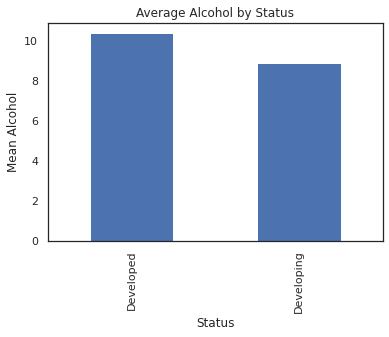

In [154]:
status_alcohol_mean.plot(kind='bar')
plt.xlabel("Status")
plt.ylabel("Mean Alcohol")
plt.title("Average Alcohol by Status")
plt.show()

In [155]:
#how does the status of the country ( developed & develpoing) effects the alcohol consuming average?
 
#Based on the data provided, 
#it can be observed that the mean level of alcohol consumption in developed countries 
#is higher than the mean level of alcohol consumption in developing countries.


In [156]:
ddc = dt[dt.Status == "Developed"]

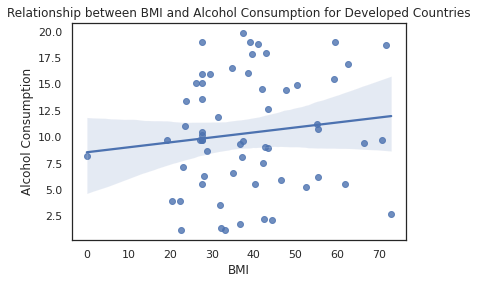

In [157]:
import seaborn as sns
sns.regplot(data=ddc, x="BMI", y="Alcohol", marker="o")
plt.xlabel("BMI")
plt.ylabel("Alcohol Consumption")
plt.title("Relationship between BMI and Alcohol Consumption for Developed Countries")
plt.show()

In [158]:
#does the alcohol consuiming average effects the body mass index (BMI)?

#there is a weak positive correlation between alcohol consumption and BMI 
# as alcohol consumption increases, BMI also increases.
#which indicating that individuals who consume more alcohol 
#tend to have a higher body mass index (BMI).

Text(0.5, 1.05, 'The Relationship Between Life Expectancy and Total Expenditure by Continents')

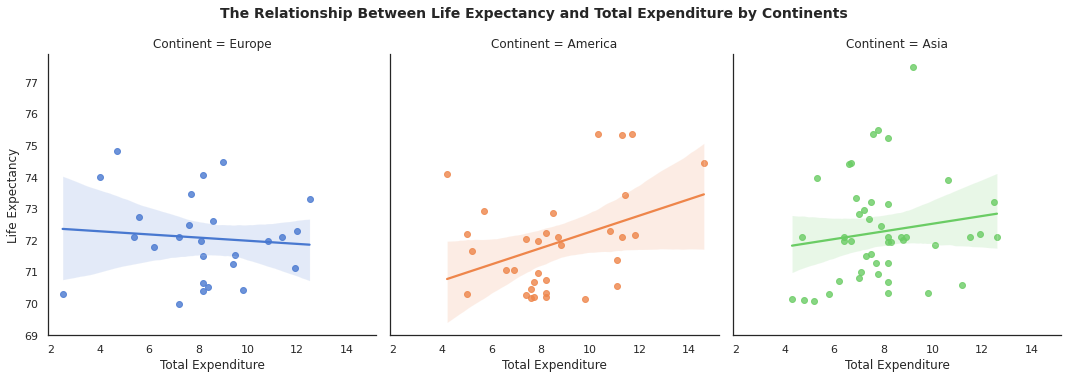

In [159]:
sns.lmplot(x="Total Expenditure",y="Life Expectancy", col="Continent",hue="Continent",
           palette="muted",data=dt).fig.suptitle("The Relationship Between Life Expectancy and Total Expenditure by Continents",
                                                 y=1.05,fontweight="bold",fontsize=14)
##There is a strong positive correlation between life expectancy and total expenditure in America.
#As the general government expenditure on health increases, life expectancy increases. 
#There is a weak positive correlation between life expectancy and total expenditure in Asia. 
#There is a weak negative correlation between life expectancy and total expenditure in Europe.

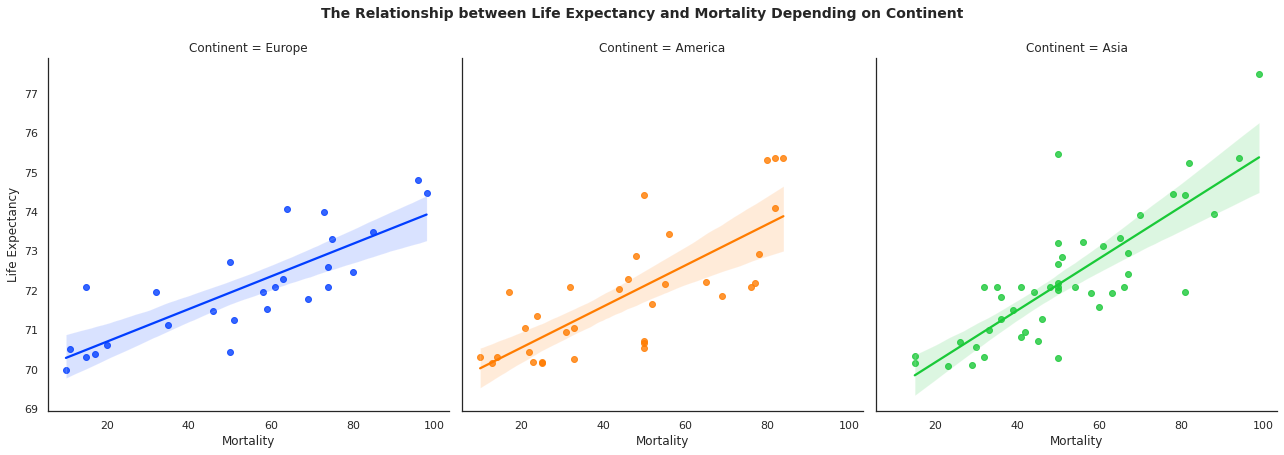

In [160]:
sns.lmplot(x='Mortality',y='Life Expectancy',height=6,col='Continent',hue='Continent'
,palette="bright",data=dt).fig.suptitle('The Relationship between Life Expectancy and Mortality Depending on Continent',
                                        y=1.05,fontsize=14,fontweight="bold")
sns.set_style("white")
plt.show()
#These 3 scatter plot shows that they have a positive strong correlation between Mortality and Life Expectancy 
#all over the Continent. This means that the value of the Mortality increases if the value of the Life Expectancy
#increases. Also, if we compare the 3 scatter plots, Asia has a stronger correlation than others. However, Europe 
#has a weaker correlation than others if we compare.


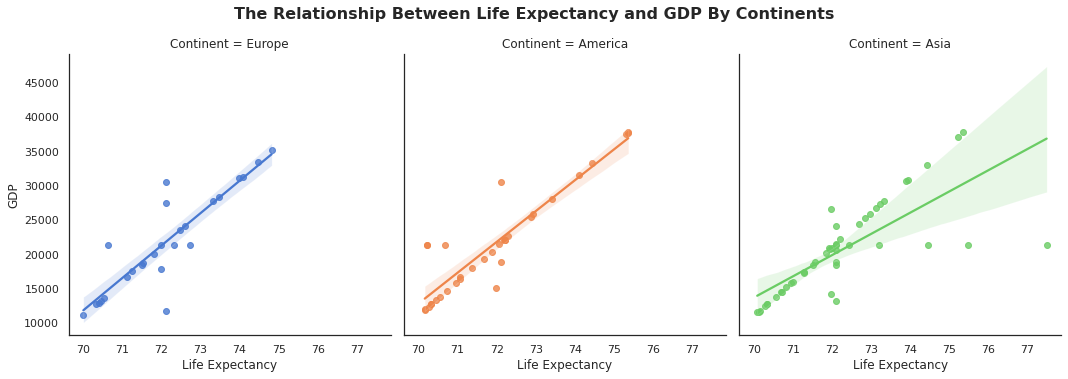

In [161]:
sns.set()
sns.set_style("white")
g = sns.lmplot(x="Life Expectancy",y="GDP",col="Continent", hue="Continent",palette="muted", data=dt).fig.suptitle("The Relationship Between Life Expectancy and GDP By Continents",y=1.05,fontweight="bold",fontsize=16)
#We see that there are almost positive lineer correlation between GDP and Life Expectancy for all the continents.It means that as GDP of the country increases, average lifespan of the people also increase almost proportionally. Correlation is weaker in Asia.

Text(0.5, 1.05, 'Distribution of Life Expectancy by Status and Continents')

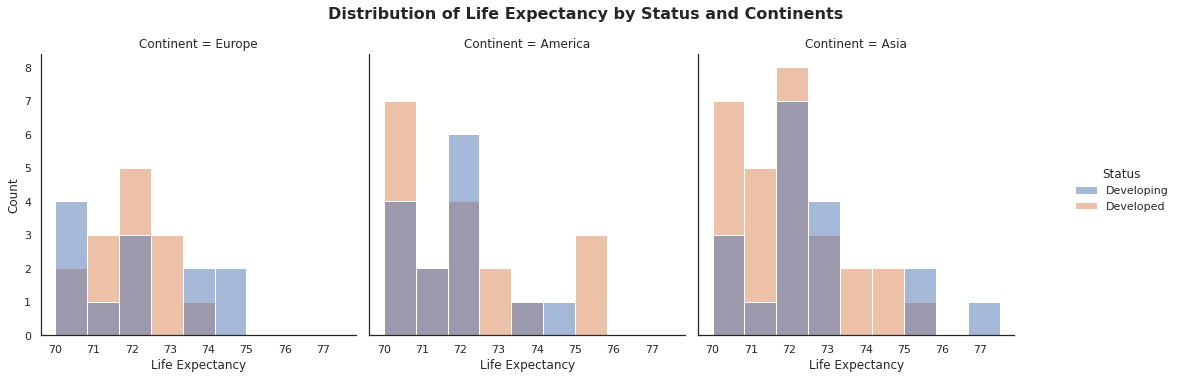

In [162]:
sns.displot(
    dt, x="Life Expectancy", col="Continent", hue="Status",
   facet_kws=dict(margin_titles=True)).fig.suptitle("Distribution of Life Expectancy by Status and Continents",y=1.05,fontweight="bold",fontsize=16)
   #We see that the majority of our data is from Asia. In Asia, most frequent life expectancy is 72 for both developing and developed countries'. We can say that the graph is right skewed for Asia. 
#It is also right skewed for America continent. Most frequent life expectancy changes by the status. It is 72 for developing countries and 70 for developed countries.
#Europe life expectancy distribution chaneges by status. It is almost bell shaped for developed countries with the mode of 72, and right skewed for developing countries with the mode of 70.

In [163]:
dt.to_excel("Clean Data.xlsx")